In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ustawienie stylu dla wykresów
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
# Wczytanie zbioru danych Automobile
automobile = fetch_ucirepo(id=10)

# Podział na cechy i zmienną docelową
X = automobile.data.features
y = automobile.data.targets

# Połączenie danych w jeden DataFrame
df = pd.concat([X, y], axis=1)

In [5]:
# Wyświetlenie informacji o zbiorze danych
print("Informacje o zbiorze danych:")
automobile.metadata

Informacje o zbiorze danych:


{'uci_id': 10,
 'name': 'Automobile',
 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile',
 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv',
 'abstract': "From 1985 Ward's Automotive Yearbook",
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 205,
 'num_features': 25,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['symboling'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1985,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5B01C',
 'creators': ['Jeffrey Schlimmer'],
 'intro_paper': None,
 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to t

In [6]:
# Informacje o zmiennych
automobile.variables

,name,role,type,demographic,description,units,missing_values
0,price,Feature,Continuous,None,continuous from 5118 to 45400,None,yes
1,highway-mpg,Feature,Continuous,None,continuous from 16 to 54,None,no
2,city-mpg,Feature,Continuous,None,continuous from 13 to 49,None,no
3,peak-rpm,Feature,Continuous,None,continuous from 4150 to 6600,None,yes
4,horsepower,Feature,Continuous,None,continuous from 48 to 288,None,yes
5,compression-ratio,Feature,Continuous,None,continuous from 7 to 23,None,no
6,stroke,Feature,Continuous,None,continuous from 2.07 to 4.17,None,yes
7,bore,Feature,Continuous,None,continuous from 2.54 to 3.94,None,yes
8,fuel-system,Feature,Categorical,None,"1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi",None,no
9,engine-size,Feature,Continuous,None,continuous from 61 to 326,None,no


In [7]:
# W Jupyter Notebook pandas automatycznie wyświetla DataFrame jako ładną tabelę HTML
# Wyświetlenie cech (X)
print("Pierwsze 10 rekordów cech:")
X.head(10)

Pierwsze 10 rekordów cech:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN


In [8]:
# Wyświetlenie zmiennej docelowej (y)
print("Pierwsze 10 rekordów zmiennych docelowych:")
y.head(10)

Pierwsze 10 rekordów zmiennych docelowych:


,symboling
0,3
1,3
2,1
3,2
4,2
5,2
6,1
7,1
8,1
9,0


In [9]:
# Wyświetlenie połączonych danych
print("Pierwsze 10 rekordów całego zbioru danych:")
df.head(10)

Pierwsze 10 rekordów całego zbioru danych:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0,1
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN,1
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0,1
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN,0


In [10]:
# Podstawowe statystyki
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [11]:
# Sprawdzanie brakujących wartości
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

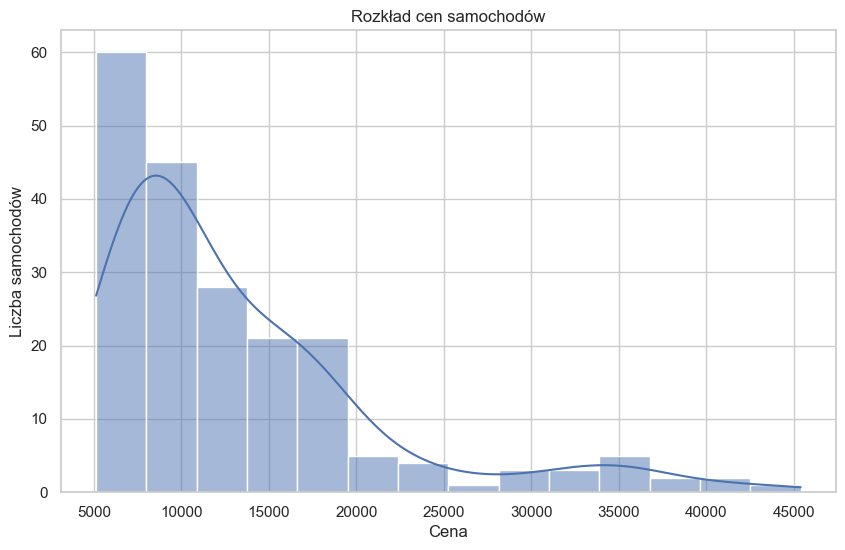

In [12]:
# Wizualizacja dystrybucji ceny samochodów
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Rozkład cen samochodów')
plt.xlabel('Cena')
plt.ylabel('Liczba samochodów')
plt.show()

/var/folders/yr/g7lvnvg12wjg3sc059f2ds8r0000gn/T/ipykernel_39093/3581288688.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


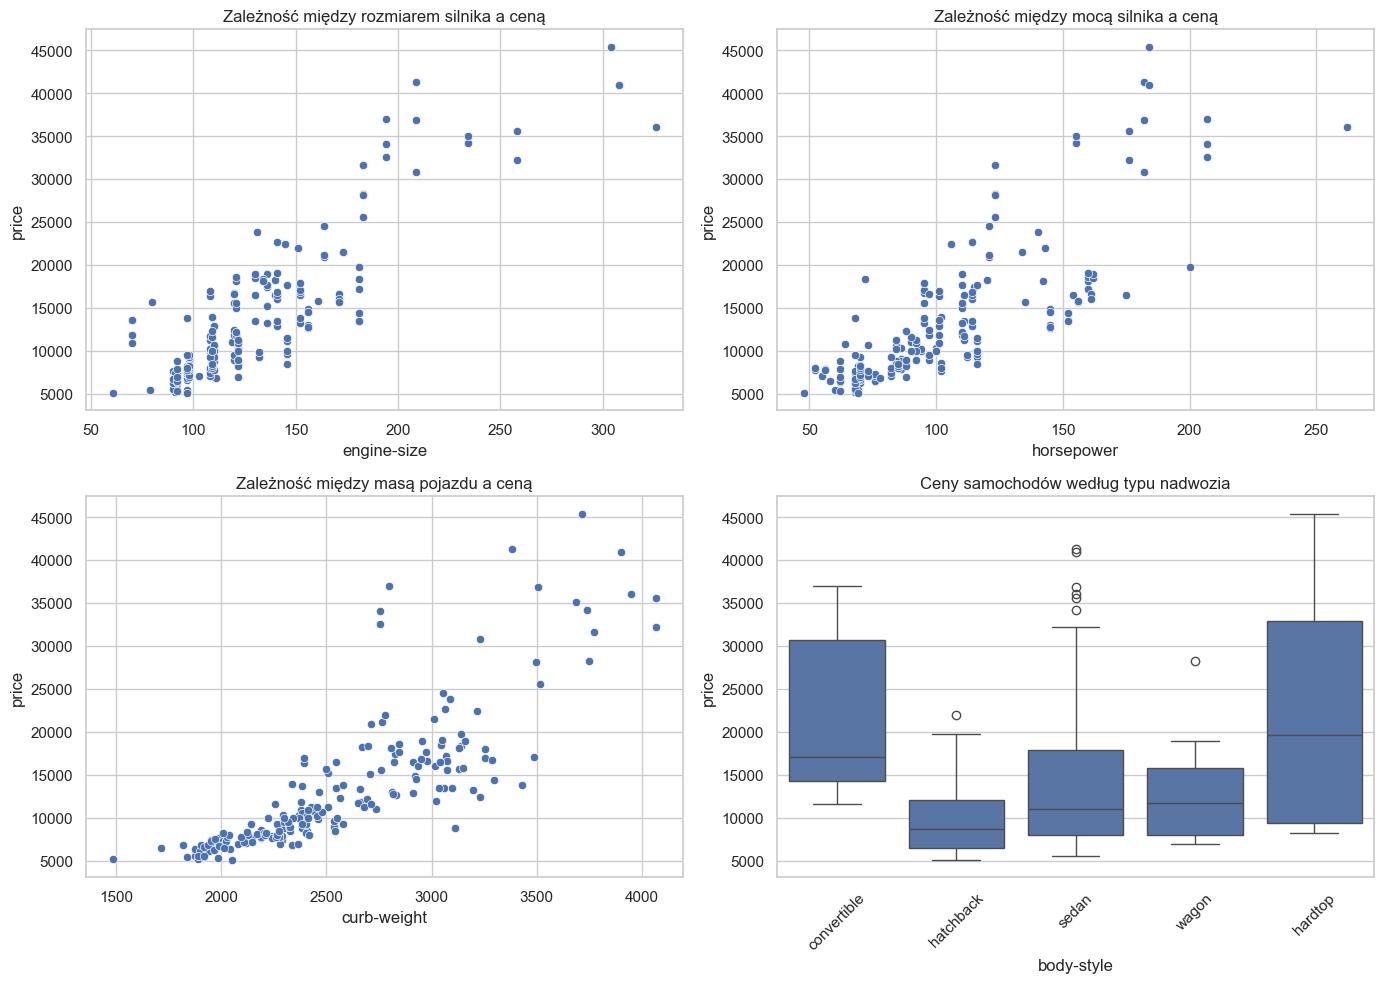

In [13]:
# Wizualizacja zależności między ceną a wybranymi cechami
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(ax=axes[0, 0], x='engine-size', y='price', data=df)
axes[0, 0].set_title('Zależność między rozmiarem silnika a ceną')

sns.scatterplot(ax=axes[0, 1], x='horsepower', y='price', data=df)
axes[0, 1].set_title('Zależność między mocą silnika a ceną')

sns.scatterplot(ax=axes[1, 0], x='curb-weight', y='price', data=df)
axes[1, 0].set_title('Zależność między masą pojazdu a ceną')

sns.boxplot(ax=axes[1, 1], x='body-style', y='price', data=df)
axes[1, 1].set_title('Ceny samochodów według typu nadwozia')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

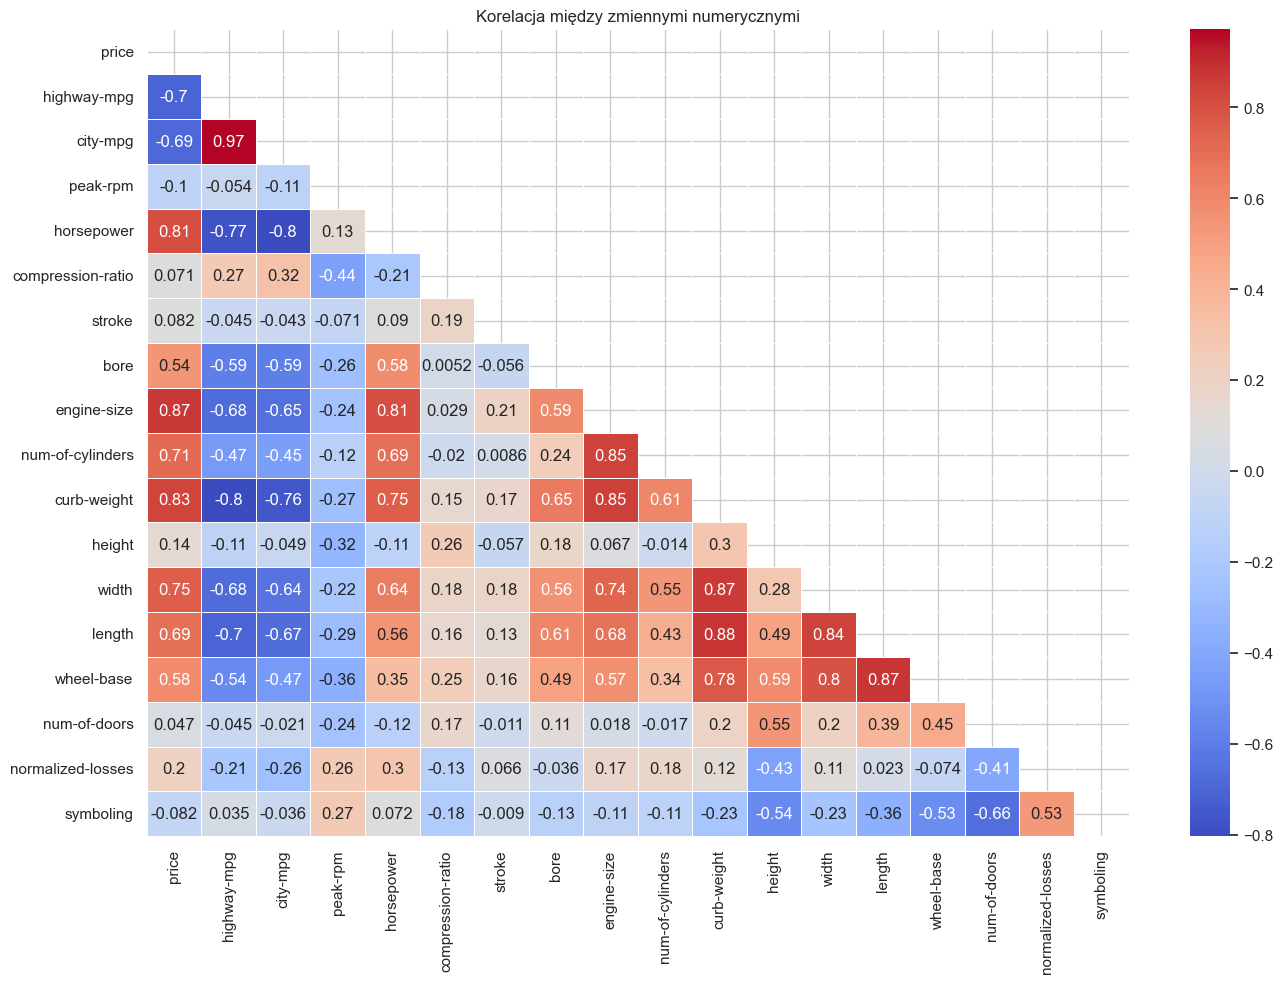

In [16]:
# Mapa korelacji dla zmiennych numerycznych
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelacja między zmiennymi numerycznymi')
plt.tight_layout()
plt.show()